In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
pd.set_option('display.float_format', '{:.2f}'.format)## adios notacion cientifica 
import seaborn as sns 
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
 
import sklearn.cluster as cluster
import time 
#sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/

In [2]:
df = pd.read_csv("segmentacion_clientes.csv" , delimiter=";" , decimal="," , encoding='utf-8')

In [3]:
df = df.sample(frac=0.05 , random_state=42)

## Se eliminan preduct_id mal formados (-)
df[df.PRODUCT_ID < 0] 
df = df[df.PRODUCT_ID > 0] 
## Convertimos las variables categoricas
#http://pbpython.com/categorical-encoding.html

df["COMUNA"] = df["COMUNA"].astype('category')
df["TIPO_REPARTO"] = df["TIPO_REPARTO"].astype('category')
df["TI"] = df["TI"].astype('category')
df["TI2"] = df["TI2"].astype('category')

# luego la encodificamos 
df["TI"] = df["TI"].cat.codes
df["TI2"] = df["TI2"].cat.codes
df["COMUNA_ENC"] = df["COMUNA"].cat.codes 
 
df[:3]

,PRODUCT_ID,SUBSCRIPTION_ID,SUBSCRIBER_ID,COMUNA,TI,TI2,TIPO_REPARTO,QUEJAS,DAÑOS,CORTES,RECLAMOS,FACTURACION_PROMEDIO,SALDO_PROMEDIO,ROTACION_CARTERA,COMUNA_ENC
489930,666776,666776,76450640,119 - Concón ...,0,1,S - REPARTO ELECTRONICO,0,0,0,0,10564.55,15230.18,1.44,2
533353,735464,735464,76521630,123 - Viña del Mar ...,0,1,N - REPARTO NORMAL,0,0,0,0,33133.00,33133.00,1.00,5
222775,308129,308129,308129,125 - Los Andes ...,0,0,N - REPARTO NORMAL,0,0,0,0,0.00,0.00,0.00,6


In [4]:
df.TI.describe()

count   31564.00
mean        0.17
std         0.37
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: TI, dtype: float64

In [4]:
 df.shape

(31564, 15)

In [20]:
## o con 
#from sklearn.preprocessing import LabelEncoder 
#lb_make = LabelEncoder()
#obj_df["make_code"] = lb_make.fit_transform(obj_df["make"])
#obj_df[["make", "make_code"]].head(11) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31564 entries, 489930 to 110564
Data columns (total 15 columns):
PRODUCT_ID              31564 non-null int64
SUBSCRIPTION_ID         31564 non-null int64
SUBSCRIBER_ID           31564 non-null int64
COMUNA                  31564 non-null category
TI                      31564 non-null category
TI2                     31564 non-null category
TIPO_REPARTO            31564 non-null category
QUEJAS                  31564 non-null int64
DAÑOS                   31564 non-null int64
CORTES                  31564 non-null int64
RECLAMOS                31564 non-null int64
FACTURACION_PROMEDIO    31564 non-null float64
SALDO_PROMEDIO          31564 non-null float64
ROTACION_CARTERA        31564 non-null float64
COMUNA_ENC              31564 non-null int8
dtypes: category(4), float64(3), int64(7), int8(1)
memory usage: 2.8 MB


In [20]:
df.columns

Index(['PRODUCT_ID', 'SUBSCRIPTION_ID', 'SUBSCRIBER_ID', 'COMUNA', 'TI', 'TI2',
       'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS',
       'FACTURACION_PROMEDIO', 'SALDO_PROMEDIO', 'ROTACION_CARTERA',
       'COMUNA_ENC'],
      dtype='object')

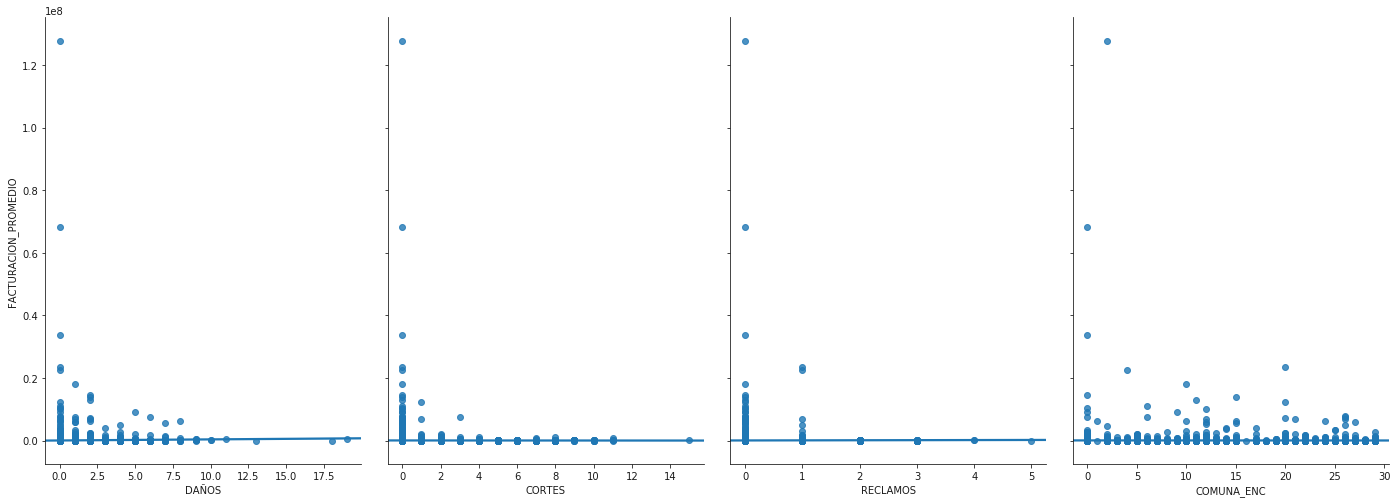

In [22]:
# Visualizar la relación entre las caracteristitas y la respuesta usando scatterplots
sns.pairplot(df, x_vars=[ 'DAÑOS','CORTES','RECLAMOS', 'COMUNA_ENC'], y_vars='FACTURACION_PROMEDIO', height=7, aspect=0.7, kind='reg')

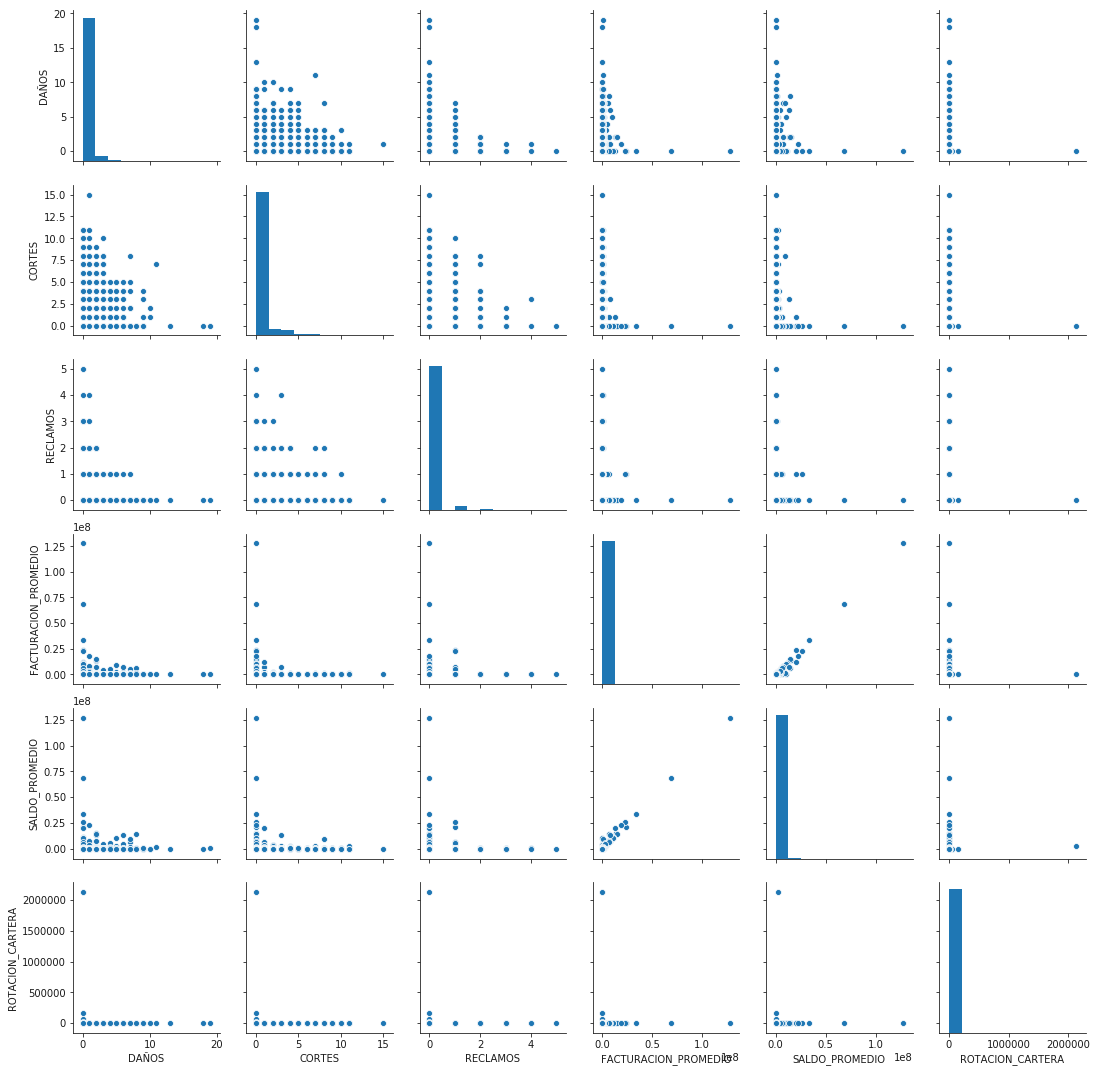

In [23]:
sns.pairplot(df[[ 'DAÑOS','CORTES','RECLAMOS','FACTURACION_PROMEDIO','SALDO_PROMEDIO','ROTACION_CARTERA' ]]) 

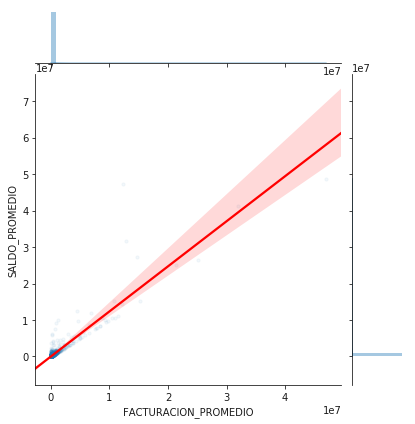

In [6]:
sns.jointplot(data =  df, x ='FACTURACION_PROMEDIO' , y ='SALDO_PROMEDIO' , kind='reg' ,   line_kws={'color': 'red'} , scatter_kws={"s": 10 , 'alpha':0.05})

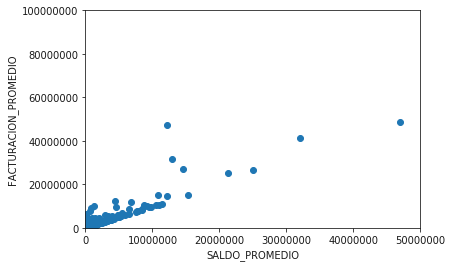

In [7]:
# Let's plot the data now 
y = df['SALDO_PROMEDIO']
x = df['FACTURACION_PROMEDIO']
  
plt.scatter(x,y)  
plt.autoscale(tight=True)
plt.ticklabel_format(useOffset=False , style='plain')
plt.ylim(0 , 100000000)
plt.xlim(0 , 50000000)
plt.xlabel("SALDO_PROMEDIO")
plt.ylabel("FACTURACION_PROMEDIO")
plt.show()


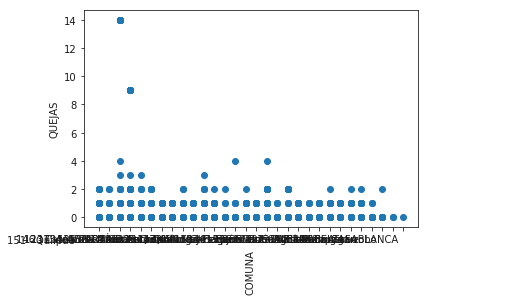

In [8]:


from matplotlib.pyplot import *
# Let's plot the data now 
x = df['COMUNA']
y = df['QUEJAS']
  
plt.scatter(x,y)  
#plt.autoscale(tight=True)
#plt.ticklabel_format(useOffset=False , style='plain')
#plt.ylim(0 , 100000000)
#plt.xlim(0 , 50000000)
h = plt.xlabel('X')
h.set_rotation(90)
plt.xlabel("COMUNA")
plt.ylabel("QUEJAS")
plt.show()

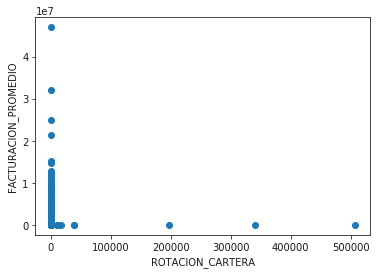

In [9]:
from matplotlib.pyplot import *
# Let's plot the data now ''ROTACION_CARTERA' ,'FACTURACION_PROMEDIO'' ,'FACTURACION_PROMEDIO'
x = df['ROTACION_CARTERA']
y = df['FACTURACION_PROMEDIO']
  
plt.scatter(x,y)  
#plt.autoscale(tight=True)
#plt.ticklabel_format(useOffset=False , style='plain')
#plt.ylim(0 , 100000000)
#plt.xlim(0 , 50000000)
#h = plt.xlabel('X')
#h.set_rotation(90)
plt.xlabel("ROTACION_CARTERA")
plt.ylabel("FACTURACION_PROMEDIO")
plt.show()

In [ ]:
# Show the survival proability as a function of age and sex
#g = sns.lmplot(x="SALDO_PROMEDIO", y="FACTURACION_PROMEDIO",   data=df[['SALDO_PROMEDIO' , 'FACTURACION_PROMEDIO']],
#                 y_jitter=.02, logistic=True)
#g.set(xlim=(0, 50000000), ylim=(0, 100000000))

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divi

In [148]:
max(y)

511427399.0

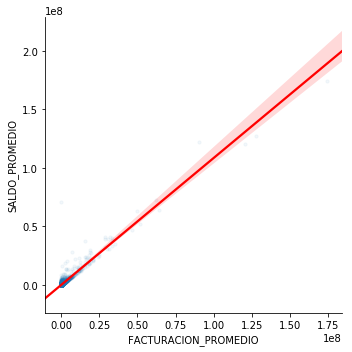

In [6]:
# Regresión lineal simple 
g = sns.lmplot(data = df,    x = 'FACTURACION_PROMEDIO', y ='SALDO_PROMEDIO' ,  line_kws={'color': 'red'} , scatter_kws={"s": 10 , 'alpha':0.05})
#g.set(ylim=(0, 400))
#g.set(xlim=(90,200))

In [128]:
#sns.jointplot(data =  df, x = 'CORTES', y ='RECLAMOS')

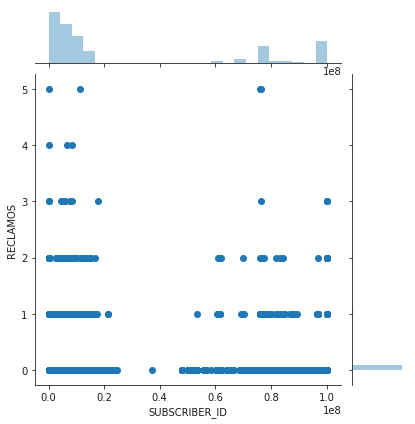

In [12]:
sns.jointplot(data =  df, x = 'SUBSCRIBER_ID', y ='RECLAMOS' )

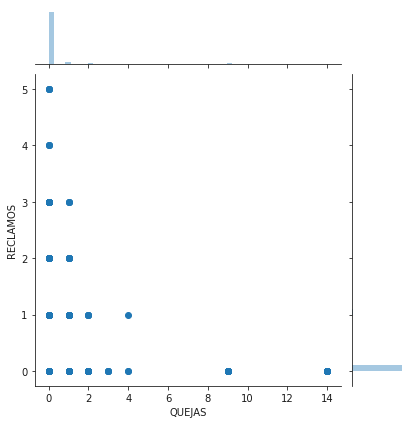

In [13]:
sns.jointplot(data =  df, x = 'QUEJAS', y ='RECLAMOS')

array([ 9,  9, 22, ...,  0,  0,  0])

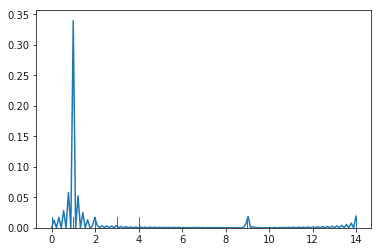

In [14]:
sns.distplot(df[[ 'QUEJAS' ]], hist=False, rug=True);

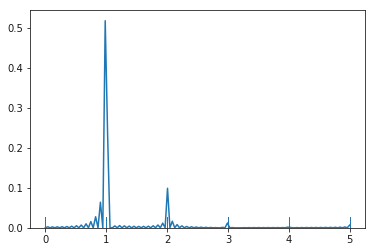

In [15]:
sns.distplot(df[['RECLAMOS']], hist=False, rug=True);

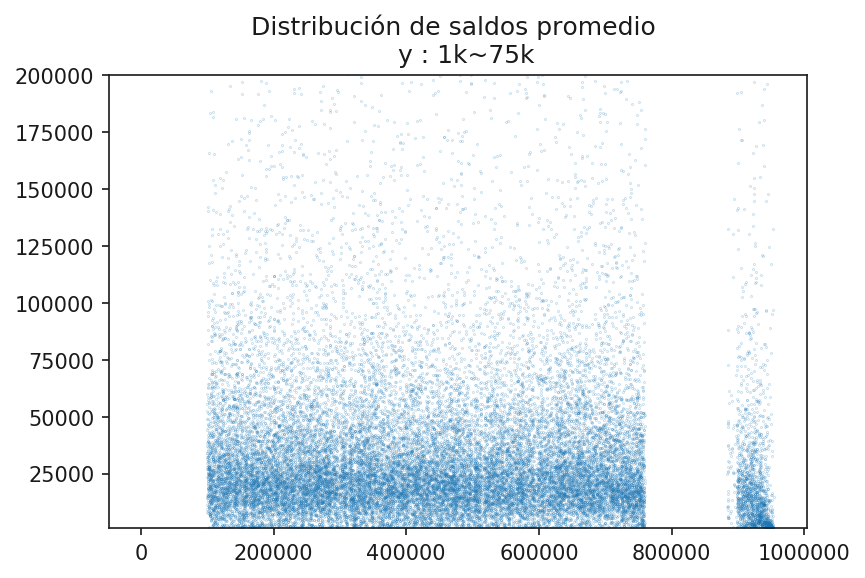

In [40]:
plt.scatter(df[['PRODUCT_ID' ]] , df[['SALDO_PROMEDIO' ]]   , s=0.01  )
plt.title('Distribución de saldos promedio \n  y : 1k~75k')
plt.ylim(1000,200000)
plt.rcParams['figure.dpi'] = 150 ##BIG PLOT
plt.ticklabel_format(useOffset=False , style='plain')

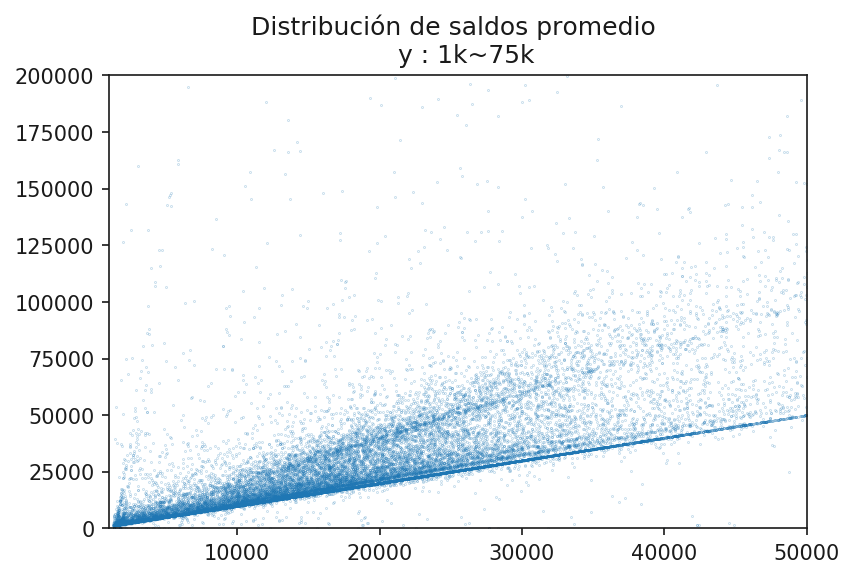

In [12]:
plt.scatter(df[['FACTURACION_PROMEDIO' ]] , df[['SALDO_PROMEDIO' ]]   , s=0.01  )
plt.title('Distribución de saldos promedio \n  y : 1k~75k')
plt.ylim(0,200000)
plt.xlim(1000,50000)
plt.rcParams['figure.dpi'] = 150 ##BIG PLOT
plt.ticklabel_format(useOffset=False , style='plain')

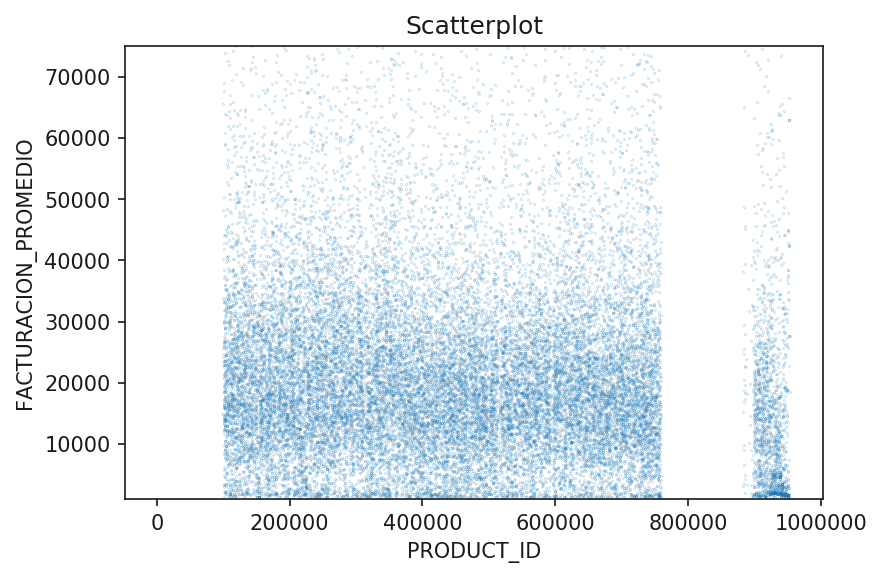

In [43]:
'''
 Grafica scatter con el nombre de 2 columnas de un Dataframe
 parametros opcionales :
     limites de los ejes X ,Y 
     formato plano evita la notacion cientifica 
     si no se envian los parametros de los limites de grafica a tamaño max 
 
 Ejemplo : Scatter(df , 'PRODUCT_ID' , 'FACTURACION_PROMEDIO', ylim_a=1000, ylim_b=75000 )

'''


def Scatter(dataframe,  x_name, y_name, xlim_a=None, xlim_b=None, ylim_a=None, ylim_b=None):

    plt.rcParams['figure.dpi'] = 150  # BIG PLOT
    plt.ticklabel_format(useOffset=False, style='plain')

    plt.scatter(df[[x_name]], df[[y_name]], s=0.01) 

    plt.title('Scatterplot')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.xlim(xlim_a, xlim_b)
    plt.ylim(ylim_a, ylim_b)

    #save plot
    plt.savefig('plots/'+'scatter '+x_name+'_'+y_name+".png")


Scatter(df, 'PRODUCT_ID', 'FACTURACION_PROMEDIO', ylim_a=1000, ylim_b=75000)

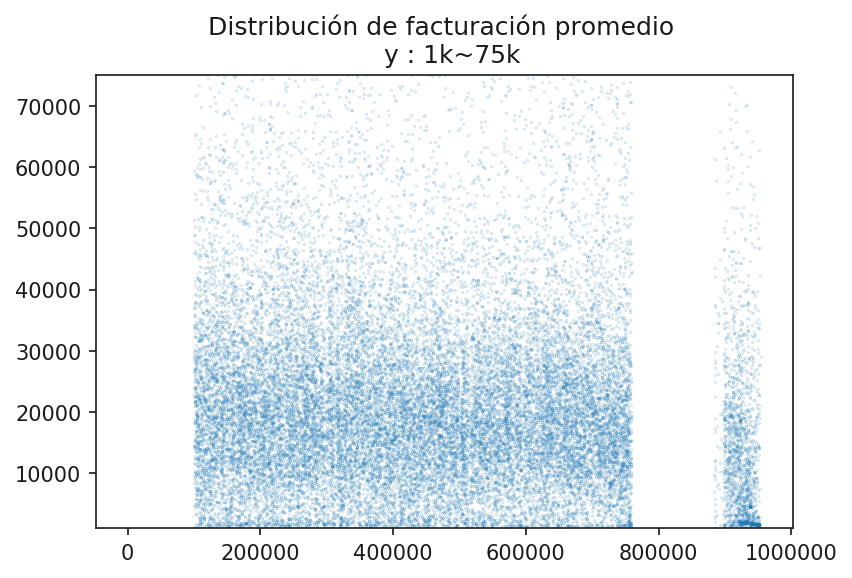

In [36]:
plt.scatter(df[['PRODUCT_ID' ]] , df[['FACTURACION_PROMEDIO' ]]   , s=0.01  )
plt.title('Distribución de facturación promedio \n  y : 1k~75k')
plt.ylim(1000,75000)
plt.rcParams['figure.dpi'] = 150 ##BIG PLOT
plt.ticklabel_format(useOffset=False , style='plain')

## DBSCAN 

- https://github.com/scikit-learn-contrib/hdbscan/blob/master/notebooks/Comparing%20Clustering%20Algorithms.ipynb

In [4]:
labels_true = np.asarray(df['COMUNA_ENC'].tolist())
labels_true 

array([16,  2,  5, ..., 28, 10, 28])

In [10]:
def  DBSCAN_PLOT( df  , radio , muestras , xcol , ycol  , xlim_a=None , xlim_b=None , ylim_a=None ,ylim_b=None):
     
    X = np.asarray(df[[xcol, ycol]]) 
    dbscan_model = DBSCAN(eps=radio ,  min_samples=muestras).fit(X)
    
    
    core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool)
    core_samples_mask[dbscan_model.core_sample_indices_] = True
    labels = dbscan_model.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    #n_noise_ = list(labels).count(-1)

    
    # #############################################################################
    # Plot result 
    
    plt.rcParams['figure.dpi'] = 150 ##BIG PLOT
    plt.ticklabel_format(useOffset=False , style='plain') 
    
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='none', markersize=1.5)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='none', markersize=0.6)

    plt.title('N° de clusters: %d' % n_clusters_ + '\n eps:%d '%radio +' min_samples:%d'  %muestras  )

    plt.xlabel(xcol)  
    plt.ylabel(ycol)
    #plt.ylim(0.75 , 3)
    plt.xlim(0 , 50000)
    
    plt.ylim(1000,600000)
    #plt.ylim(0.75 , 3)
    #plt.xlim(0 , 50000)

    #plt.xlabel("FACTURACION_PROMEDIO")70.100
    #plt.ylabel("SALDO_PROMEDIO")
    #plt.xlim(1250 , 100000)
    #plt.ylim(1250 , 100000) 

    plt.show()

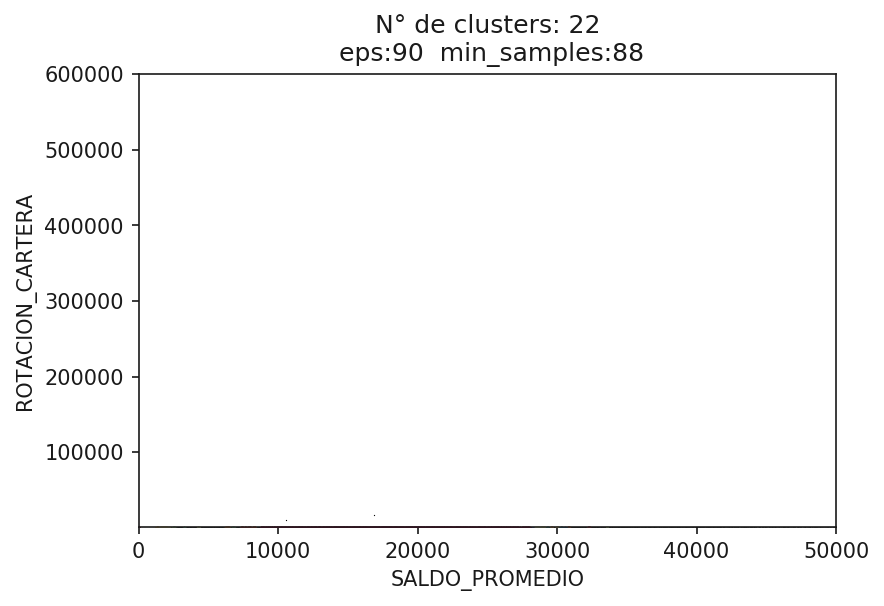

In [11]:
DBSCAN_PLOT( df  , 90 , 88 ,  'SALDO_PROMEDIO' , 'ROTACION_CARTERA' )

In [1]:
GRAFICO_DBSCAN( df  , 4 , 1 ,  'DAÑOS' , 'CORTES' )

NameError: name 'GRAFICO_DBSCAN' is not defined

KeyboardInterrupt: 

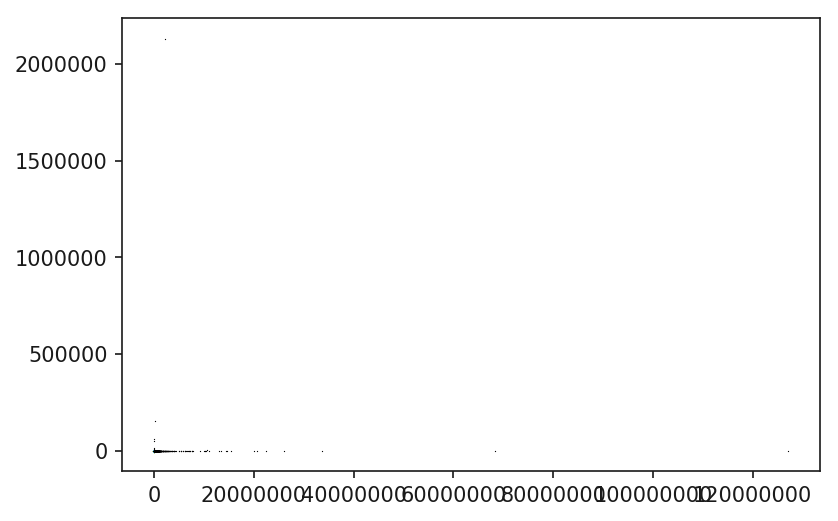

In [6]:
'''
Grafica los clusters dado 2 columnas de datos de un df 
 Parametros opcionales :
     limites de los ejes X ,Y 
     formato plano evita la notacion cientifica 
     si no se envian los parametros de los limites de grafica a tamaño max 
 
 Ejemplo :DBSCAN_PLOT( df  , 90 , 88 ,  'SALDO_PROMEDIO' , 'ROTACION_CARTERA' , xlim_a=0 , xlim_b=50000 , ylim_a=0 , ylim_b=2  )
'''


def DBSCAN_PLOT(data, eps, min_samples, x_name, y_name, xlim_a=None, xlim_b=None, ylim_a=None, ylim_b=None):
 
    # Instancia el modelo
    dbscan_model = DBSCAN(eps=eps,  min_samples=min_samples).fit(data)

    # Vector de referencia a los clusters
    core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool) 
  
    core_samples_mask[dbscan_model.core_sample_indices_] = True
    
    # Etiquetas
    labels = dbscan_model.labels_

    # Número de clusters
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    # Números de outiers
    #n_noise_ = list(labels).count(-1)

    # #############################################################################
    # Plot result

    plt.rcParams['figure.dpi'] = 150  # BIG PLOT
    plt.ticklabel_format(useOffset=False, style='plain')  # AVOID SCY NOT

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='none', markersize=1.5)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='none', markersize=0.6)
        
    #silueta = metrics.silhouette_score(X , labels)

    plt.title('DBSCAN clusters~ %d' % n_clusters_ + '\n eps:%d ' %
              eps + ' min_samples:%d' % min_samples + 'silueta : %d'% silueta)
     
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    
    plt.xlim(xlim_a, xlim_b)
    plt.ylim(ylim_a, ylim_b)
    
    #save plot
    plt.savefig('plots/'+'dbscan '+x_name+'_'+y_name+' c'+str(n_clusters_)+' e'+str(eps)+' m'+str(min_samples)+".png")

    plt.show()
    return labels 
    
    
DBSCAN_PLOT( df  , 200 , 200 ,  'SALDO_PROMEDIO' , 'ROTACION_CARTERA' , xlim_a=0 , xlim_b=50000 , ylim_a=0.75 , ylim_b=2  )

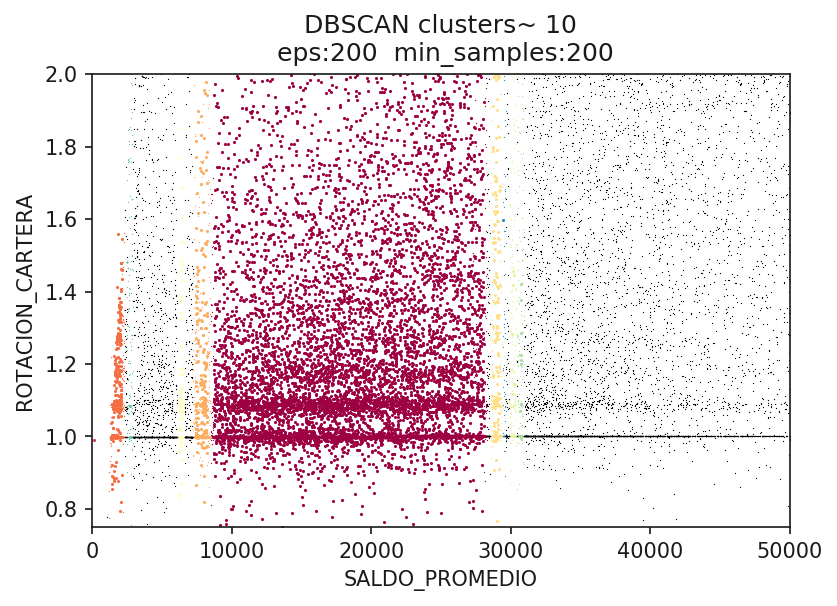

In [58]:
## get clusters 

df_salida = df 
grupos = DBSCAN_PLOT( df  , 200 , 200 ,  'SALDO_PROMEDIO' , 'ROTACION_CARTERA' , xlim_a=0 , xlim_b=50000 , ylim_a=0.75 , ylim_b=2  )
df_salida['cluster']=grupos

(0.8, 2)

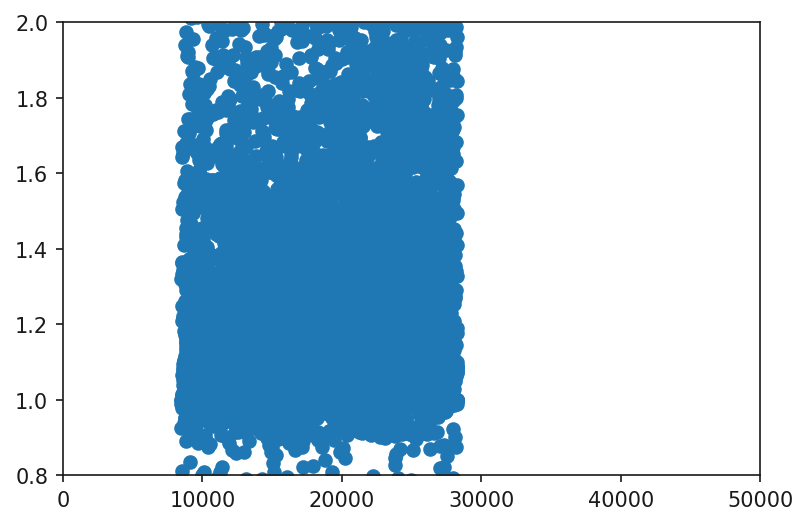

In [76]:
df_salida[(df_salida['cluster'] == 2)]

plt.scatter(df_salida[(df_salida['cluster'] == 0)].SALDO_PROMEDIO , df_salida[(df_salida['cluster'] == 0)].ROTACION_CARTERA)
plt.xlim(0,50000)
plt.ylim(0.8,2)

In [ ]:
Scatter( )

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31564 entries, 489930 to 110564
Data columns (total 15 columns):
PRODUCT_ID              31564 non-null int64
SUBSCRIPTION_ID         31564 non-null int64
SUBSCRIBER_ID           31564 non-null int64
COMUNA                  31564 non-null category
TI                      31564 non-null category
TI2                     31564 non-null category
TIPO_REPARTO            31564 non-null category
QUEJAS                  31564 non-null int64
DAÑOS                   31564 non-null int64
CORTES                  31564 non-null int64
RECLAMOS                31564 non-null int64
FACTURACION_PROMEDIO    31564 non-null float64
SALDO_PROMEDIO          31564 non-null float64
ROTACION_CARTERA        31564 non-null float64
COMUNA_ENC              31564 non-null int8
dtypes: category(4), float64(3), int64(7), int8(1)
memory usage: 2.8 MB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31564 entries, 489930 to 110564
Data columns (total 15 columns):
PRODUCT_ID              31564 non-null int64
SUBSCRIPTION_ID         31564 non-null int64
SUBSCRIBER_ID           31564 non-null int64
COMUNA                  31564 non-null category
TI                      31564 non-null int8
TI2                     31564 non-null int8
TIPO_REPARTO            31564 non-null category
QUEJAS                  31564 non-null int64
DAÑOS                   31564 non-null int64
CORTES                  31564 non-null int64
RECLAMOS                31564 non-null int64
FACTURACION_PROMEDIO    31564 non-null float64
SALDO_PROMEDIO          31564 non-null float64
ROTACION_CARTERA        31564 non-null float64
COMUNA_ENC              31564 non-null int8
dtypes: category(2), float64(3), int64(7), int8(3)
memory usage: 2.8 MB


In [9]:
eps=90
min_samples=88 

#'PRODUCT_ID', 'SUBSCRIPTION_ID', 'SUBSCRIBER_ID', 'COMUNA', 'TI', 'TI2',
#       'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS',
#       'FACTURACION_PROMEDIO', 'SALDO_PROMEDIO', 'ROTACION_CARTERA',
#       'COMUNA_ENC'

x_col ='SALDO_PROMEDIO'
y_col ='ROTACION_CARTERA'


X = np.asarray(df[[x_col, y_col]]) 
dbscan_model = DBSCAN(eps=eps ,  min_samples=min_samples   ).fit(X)

In [10]:
core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool)
core_samples_mask[dbscan_model.core_sample_indices_] = True
labels = dbscan_model.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

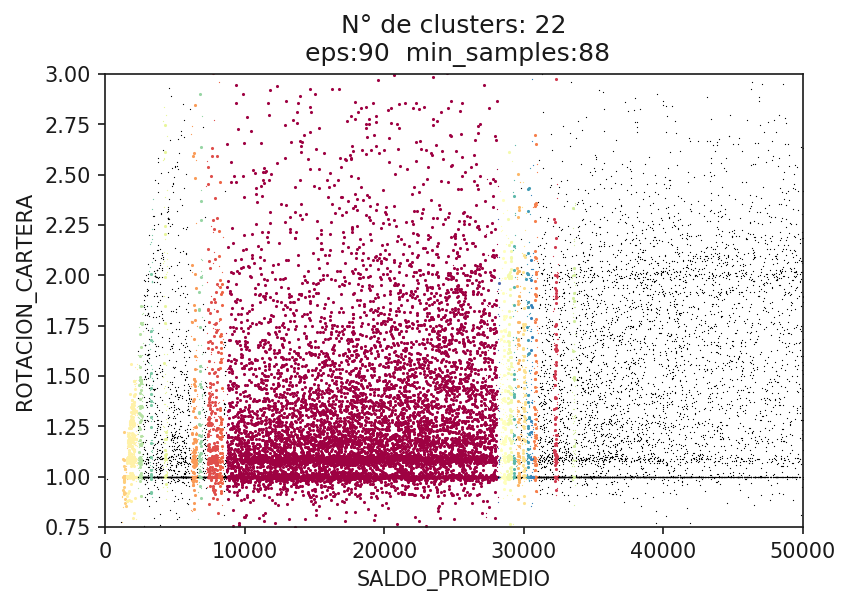

In [12]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150 ##BIG PLOT
plt.ticklabel_format(useOffset=False , style='plain')
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='none', markersize=1.5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='none', markersize=0.6)
    
    
    
#silueta = metrics.silhouette_score(X , labels)
#print(silueta)

plt.title('N° de clusters: %d' % n_clusters_ + '\n eps:%d '%eps +' min_samples:%d'  %min_samples  )

plt.xlabel('SALDO_PROMEDIO')  
plt.ylabel('ROTACION_CARTERA')
plt.ylim(0.75 , 3)
plt.xlim(0 , 50000)
 
#plt.xlabel("FACTURACION_PROMEDIO")70.100
#plt.ylabel("SALDO_PROMEDIO")
#plt.xlim(1250 , 100000)
#plt.ylim(1250 , 100000) 

plt.show()

In [15]:


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 17
Estimated number of noise points: 2974


In [39]:
'''
Recibe la fraccion que se va a cargar del set de datos 
Por defecto se carga el 0.01 %   
'''
def CargaDatos(frac=0.01):
    data = pd.read_csv("segmentacion_clientes.csv" , delimiter=";" , decimal="," , encoding='utf-8')
    ## muestra aleatorea de los datos 
    data = data.sample(frac=0.01 , random_state=42)
    return data

def Correlograma(data):
    sns.pairplot(data) 
    rows = str(data.shape[0])
    #save plot
    plt.savefig('plots/'+ 'coor.png')
    

'''
Grafica de puntos con una reg lin 
    Scatter( df , 'QUEJAS' , 'RECLAMOS' , xlim_a=0 ,xlim_b=1 , ylim_a=0, ylim_b=1  )
'''
def Scatter2(data  , x_name , y_name , xlim_a=None, xlim_b=None, ylim_a=None, ylim_b=None ):
    g = sns.lmplot(data = data , x = x_name, y =y_name  , line_kws={'color': 'red'})
    g.set(xlim=(xlim_a, xlim_b), ylim=(ylim_a, ylim_b))
    
'''
 Grafica scatter con el nombre de 2 columnas de un Dataframe
 parametros opcionales :
     limites de los ejes X ,Y 
     formato plano evita la notacion cientifica 
     si no se envian los parametros de los limites de grafica a tamaño max 
 
 Ejemplo : Scatter(df , 'PRODUCT_ID' , 'FACTURACION_PROMEDIO', ylim_a=1000, ylim_b=75000 )

''' 
def Scatter(df, x_name, y_name, xlim_a=None, xlim_b=None, ylim_a=None, ylim_b=None):

    plt.rcParams['figure.dpi'] = 150  # BIG PLOT
    plt.ticklabel_format(useOffset=False, style='plain')

    plt.scatter(df[[x_name]], df[[y_name]], s=0.01) 

    plt.title('Scatterplot')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.xlim(xlim_a, xlim_b)
    plt.ylim(ylim_a, ylim_b)

    #save plot
    plt.savefig('plots/'+'scatter '+x_name+'_'+y_name+".png")

    
    
'''
Grafica los clusters dado 2 columnas de datos de un df 
 Parametros opcionales :
     limites de los ejes X ,Y 
     formato plano evita la notacion cientifica 
     si no se envian los parametros de los limites de grafica a tamaño max 
 
 Ejemplo :DBSCAN_PLOT( df  , 90 , 88 ,  'SALDO_PROMEDIO' , 'ROTACION_CARTERA' , xlim_a=0 , xlim_b=50000 , ylim_a=0 , ylim_b=2  )
'''


def DBSCAN_PLOT(df, eps, min_samples, x_name, y_name, xlim_a=None, xlim_b=None, ylim_a=None, ylim_b=None):

    # Tranforma los datos a numpy array
    X = np.asarray(df[[x_name, y_name , 'PRODUCT_ID']])

    # crea el modelo
    dbscan_model = DBSCAN(eps=eps,  min_samples=min_samples).fit(X)

    # crea un verctor de boleanos con los labesl
    core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool)

    # vector de indices ? where 1
    core_samples_mask[dbscan_model.core_sample_indices_] = True

    labels = dbscan_model.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    #n_noise_ = list(labels).count(-1)

    # #############################################################################
    # Plot result

    plt.rcParams['figure.dpi'] = 150  # BIG PLOT
    plt.ticklabel_format(useOffset=False, style='plain')  # AVOID SCY NOT

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='none', markersize=1.5)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='none', markersize=0.6)

    plt.title('DBSCAN clusters~ %d' % n_clusters_ + '\n eps:%d ' %
              eps + ' min_samples:%d' % min_samples)
     
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    
    plt.xlim(xlim_a, xlim_b)
    plt.ylim(ylim_a, ylim_b)
    
    #save plot
    plt.savefig('plots/'+'dbscan '+x_name+'_'+y_name+' c'+str(n_clusters_)+' e'+str(eps)+' m'+str(min_samples)+".png")

    plt.show()
    
    return labels 
    
      

def kNNPlot(df , x_name, y_name,  k ):
    from sklearn.neighbors import NearestNeighbors
    df = df[[x_name, y_name]]
    
    nbrs = NearestNeighbors(n_neighbors=k).fit(df)
    distances, indices = nbrs.kneighbors(df)
    
    # invierte el orden para presentacion 
    distanceDec = sorted(distances[:,k-1], reverse=False)
    #plt.plot(indices[:,0], distanceDec  )
    
    max_rows = df.shape[0] 
    
    plt.plot(list(range(1,max_rows+1)), distanceDec) 
    
    plt.title('eps Óptimo para DBSCAN ')
    plt.xlabel('numrows')
    plt.ylabel('nkk (%d ) Distancias'%k )

    # plotea al maximo de filas 
    plt.xlim(0, max_rows)
    # la media de las distancias ( revisar en dataset pequeños )
    plt.ylim(0, np.mean(distanceDec) )#200 
     
    #save plot
    plt.savefig('plots/'+'knn '+x_name+'_'+y_name+".png")
     
    
#kNNPlot(df , 'QUEJAS' , 'RECLAMOS' , k=50)

In [36]:
df

,PRODUCT_ID,SUBSCRIPTION_ID,SUBSCRIBER_ID,COMUNA,TI,TI2,TIPO_REPARTO,QUEJAS,DAÑOS,CORTES,RECLAMOS,FACTURACION_PROMEDIO,SALDO_PROMEDIO,ROTACION_CARTERA,COMUNA_ENC
489930,666776,666776,76450640,119 - Concón ...,0,1,S - REPARTO ELECTRONICO,0,0,0,0,10564.55,15230.18,1.44,2
533353,735464,735464,76521630,123 - Viña del Mar ...,0,1,N - REPARTO NORMAL,0,0,0,0,33133.00,33133.00,1.00,5
222775,308129,308129,308129,125 - Los Andes ...,0,0,N - REPARTO NORMAL,0,0,0,0,0.00,0.00,0.00,6
413517,538584,538584,13047169,135 - LA CALERA ...,0,1,S - REPARTO ELECTRONICO,0,0,0,0,21314.09,21314.09,1.00,11
267704,318182,318182,5929146,151 - Quilpué ...,0,0,N - REPARTO NORMAL,0,4,0,0,30824.64,39170.18,1.27,26
408472,575931,575931,13368784,139 - San Antonio ...,0,0,S - REPARTO ELECTRONICO,0,0,0,0,1490.18,1490.18,1.00,15
484787,710270,710270,13998635,117 - VALPARAÍSO ...,0,1,S - REPARTO ELECTRONICO,0,0,0,0,18362.00,32284.27,1.76,0
626077,912548,899762,100028834,121 - Puchuncaví ...,0,0,S - REPARTO ELECTRONICO,0,0,0,0,12444.55,12444.55,1.00,3
346095,378860,378860,378860,134 - Quillota ...,0,0,N - REPARTO NORMAL,0,0,0,0,15301.42,23356.50,1.53,10
404250,519561,519561,7133852,145 - San Felipe ...,0,1,N - REPARTO NORMAL,0,0,2,0,14561.73,28169.80,1.93,20


 ## Carga de datos 

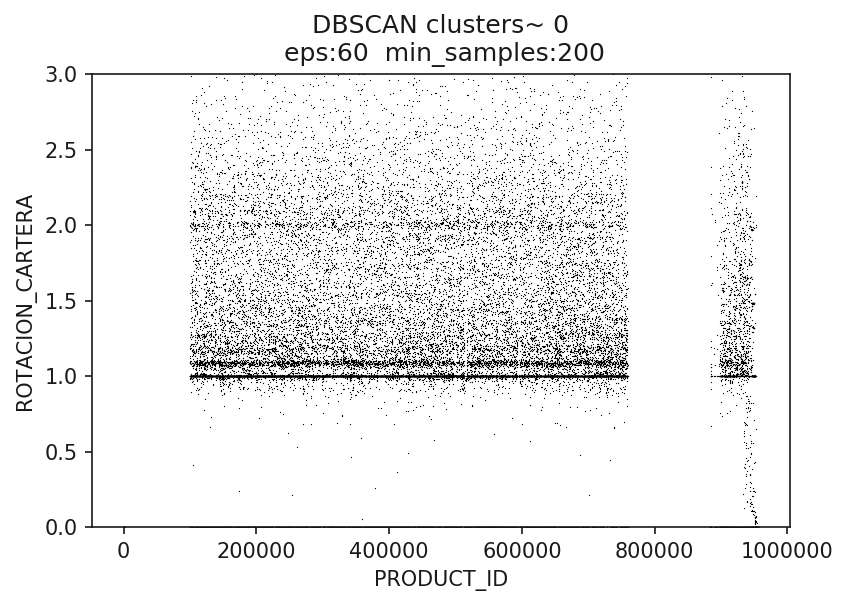

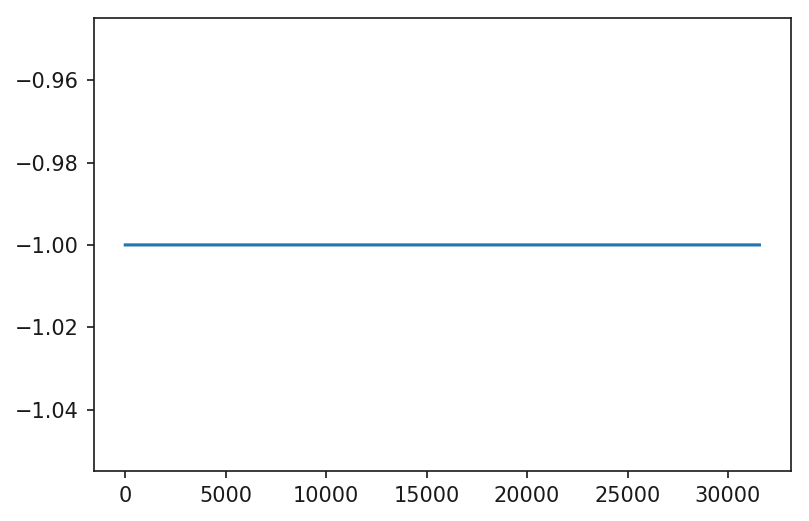

In [42]:
## retornando los labels 

clusters = DBSCAN_PLOT( df  , 60 , 200 ,  'PRODUCT_ID' , 'ROTACION_CARTERA'   , ylim_a=0  , ylim_b=3   )


plt.plot(clusters)

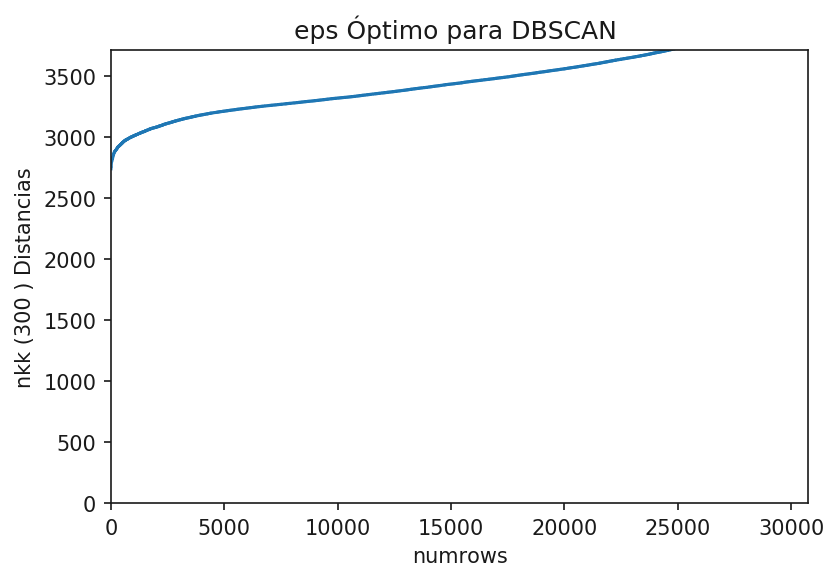

In [20]:
kNNPlot(df   , 'PRODUCT_ID' , 'ROTACION_CARTERA'  , 300 )

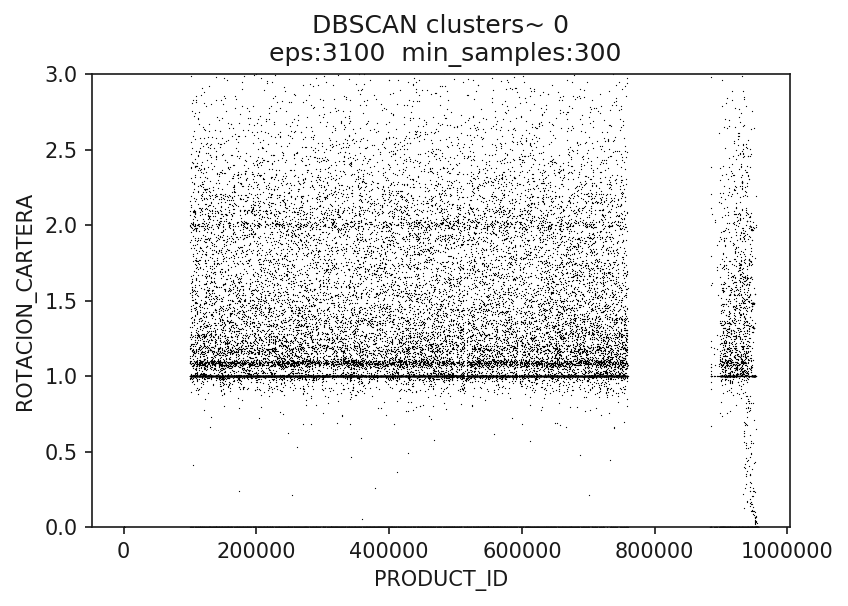

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [43]:
DBSCAN_PLOT( df  , 3100 , 300 ,  'PRODUCT_ID' , 'ROTACION_CARTERA'   , ylim_a=0  , ylim_b=3   )

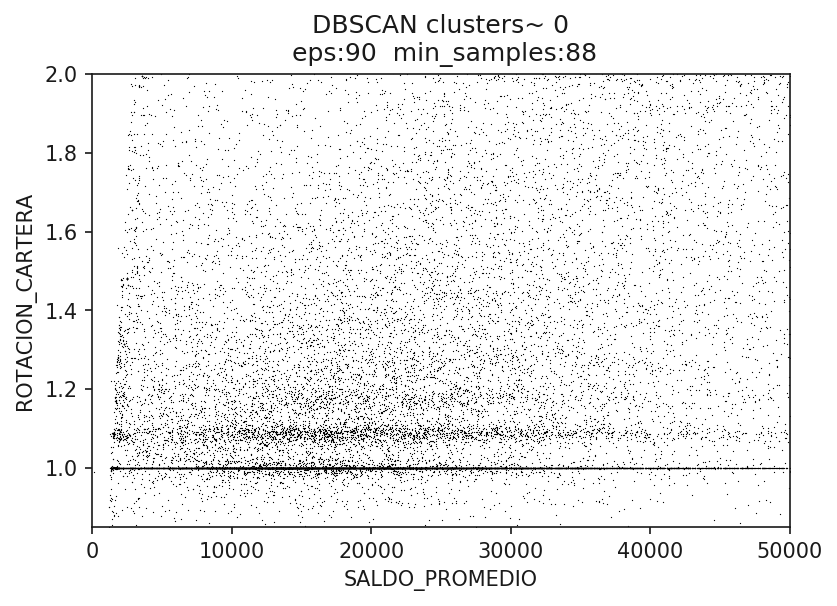

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [44]:
DBSCAN_PLOT( df  , 90 , 88 ,  'SALDO_PROMEDIO' , 'ROTACION_CARTERA' , xlim_a=0 , xlim_b=50000 , ylim_a=0.85 , ylim_b=2  )

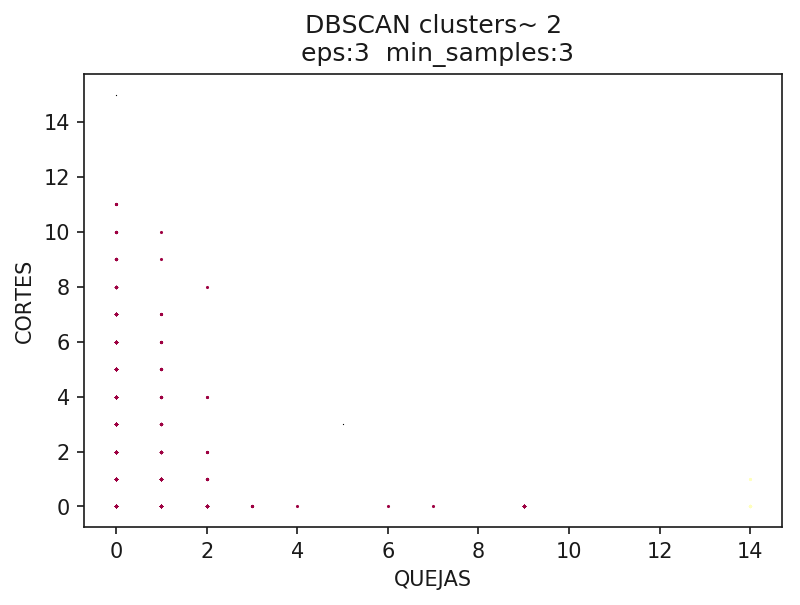

In [6]:
DBSCAN_PLOT(df ,  3, 3 , 'QUEJAS' ,'ROTACION_CARTERA' )

In [26]:
df.columns

Index(['PRODUCT_ID', 'SUBSCRIPTION_ID', 'SUBSCRIBER_ID', 'COMUNA', 'TI', 'TI2',
       'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS',
       'FACTURACION_PROMEDIO', 'SALDO_PROMEDIO', 'ROTACION_CARTERA',
       'COMUNA_ENC'],
      dtype='object')

In [23]:
# eliminacion de outliers segun DBSCAN 

df = df[df.SALDO_PROMEDIO < 250000] 
df = df[df.FACTURACION_PROMEDIO < 200000] 
df = df[df.ROTACION_CARTERA < 20]  

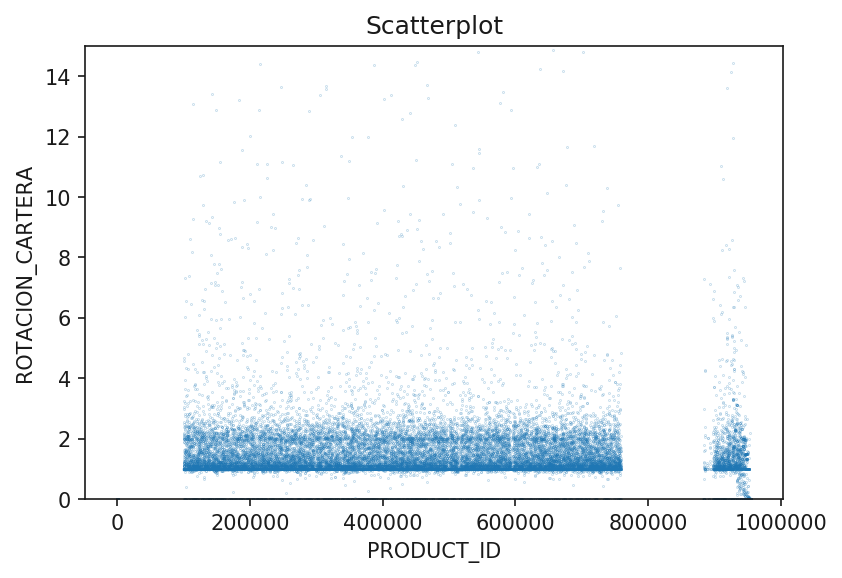

In [11]:
Scatter(df , 'PRODUCT_ID' ,'ROTACION_CARTERA' , ylim_b=15 , ylim_a=0 )

In [27]:
df. > 2500

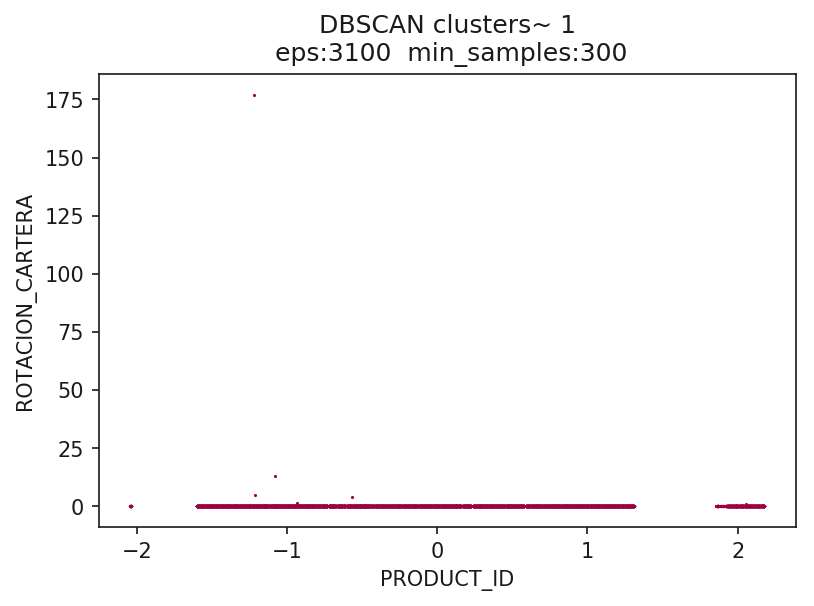

In [57]:
#cluster de rotaciones cartera ente 0 y 1 de  

df = df[['PRODUCT_ID','ROTACION_CARTERA']]
stscaler = StandardScaler().fit(df)
df = pd.DataFrame(stscaler.transform(df) , columns=['PRODUCT_ID' , 'ROTACION_CARTERA'])




#DBSCAN_PLOT( df  , 90 , 88 ,  'SALDO_PROMEDIO' , 'ROTACION_CARTERA' , xlim_a=0 , xlim_b=50000 , ylim_a=0.85 , ylim_b=2  )
DBSCAN_PLOT( df  , 3100 , 300 ,  'PRODUCT_ID' , 'ROTACION_CARTERA'       )


array([[ 0.90828369,  0.03122878],
       [ 1.21198491, -0.35520421],
       [-0.67745954, -1.23040064],
       ...,
       [ 0.52314361, -0.15944026],
       [ 1.30155926, -0.16859566],
       [-1.43344955,  0.69658195]])

In [51]:
CLUSTER =  df[(df['PRODUCT_ID'] > 900000) &  (df['ROTACION_CARTERA'] <= 0.9999) &   (df['ROTACION_CARTERA'] >= 0)  ]
#CLUSTER.groupby( [ "COMUNA" ] ).count()
CLUSTER.describe()

,PRODUCT_ID,SUBSCRIPTION_ID,SUBSCRIBER_ID,QUEJAS,DAÑOS,CORTES,RECLAMOS,FACTURACION_PROMEDIO,SALDO_PROMEDIO,ROTACION_CARTERA,COMUNA_ENC
count,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00
mean,936818.38,897783.73,78856697.78,0.11,0.05,0.00,0.00,6374.89,3490.73,0.37,14.20
std,17615.11,127831.13,30849332.39,0.89,0.38,0.06,0.07,12486.36,8407.34,0.45,10.55
min,900042.00,108674.00,147801.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,923024.25,906439.50,76111850.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00
50%,944256.50,931473.50,96963150.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00
75%,951433.75,939706.25,100115956.50,0.00,0.00,0.00,0.00,8026.47,3312.28,0.98,26.00
max,955472.00,943966.00,100245685.00,14.00,7.00,1.00,1.00,141193.50,140368.25,1.00,29.00
